In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-social-media-on-suicide-rates/social-media-impact-on-suicide-rates.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/impact-of-social-media-on-suicide-rates/social-media-impact-on-suicide-rates.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

   year   sex  Suicide Rate % change since 2010  \
0  2010  BTSX                        100.000000   
1  2010  FMLE                        100.000000   
2  2010   MLE                        100.000000   
3  2011  BTSX                         98.681894   
4  2011  FMLE                         98.183773   

   Twitter user count % change since 2010  \
0                              100.000000   
1                              100.000000   
2                              100.000000   
3                              216.666667   
4                              216.666667   

   Facebook user count % change since 2010  
0                               100.000000  
1                               100.000000  
2                               100.000000  
3                               138.980263  
4                               138.980263  


In [3]:
print(data.isnull().sum()) #checkingfor null values

year                                       0
sex                                        0
Suicide Rate % change since 2010           0
Twitter user count % change since 2010     0
Facebook user count % change since 2010    0
dtype: int64


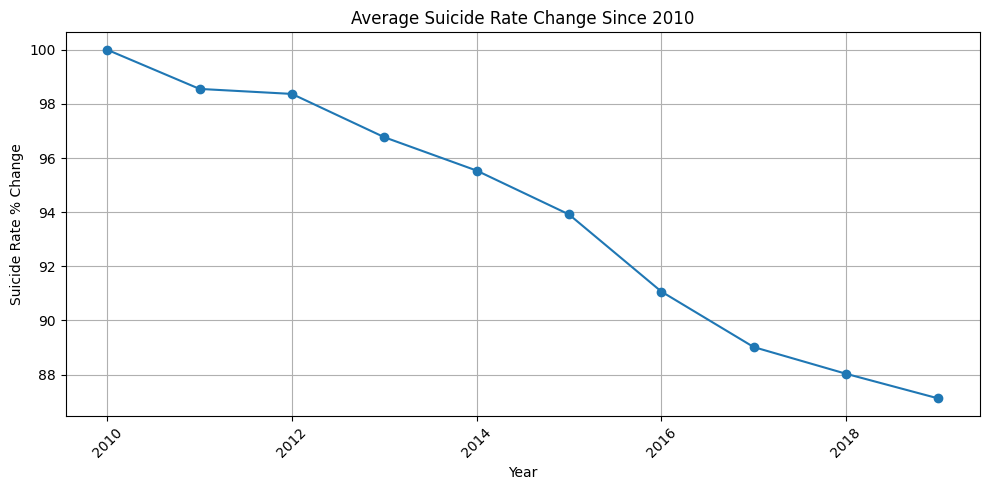

In [4]:
# Analyze the percentage change in suicide rates since 2010 by year
suicide_rate_change = data.groupby('year')['Suicide Rate % change since 2010'].mean().reset_index()

# Plotting the average suicide rate change over the years
plt.figure(figsize=(10, 5))
plt.plot(suicide_rate_change['year'], suicide_rate_change['Suicide Rate % change since 2010'], marker='o')
plt.title('Average Suicide Rate Change Since 2010')
plt.xlabel('Year')
plt.ylabel('Suicide Rate % Change')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

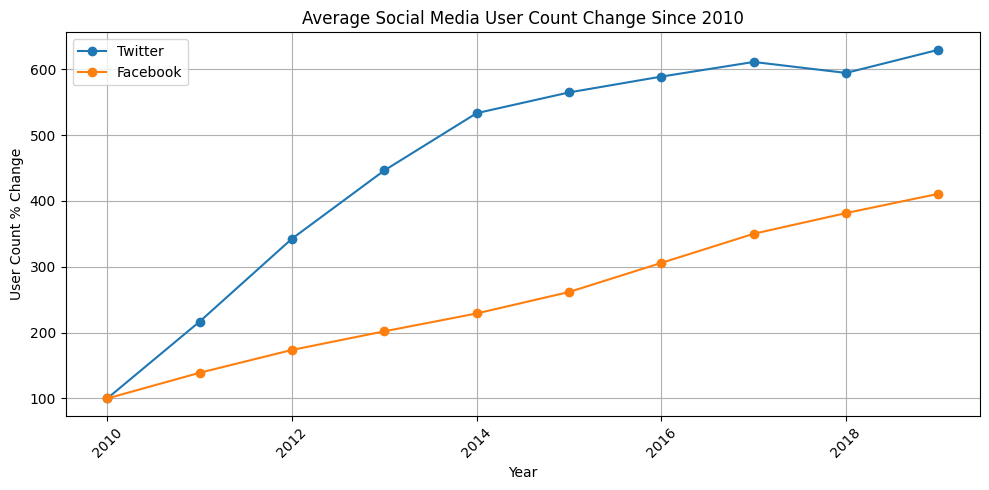

In [5]:
# Analyze Twitter and Facebook user count changes
user_count_change = data.groupby('year')[['Twitter user count % change since 2010', 'Facebook user count % change since 2010']].mean().reset_index()

# Plotting user count changes
plt.figure(figsize=(10, 5))
plt.plot(user_count_change['year'], user_count_change['Twitter user count % change since 2010'], marker='o', label='Twitter')
plt.plot(user_count_change['year'], user_count_change['Facebook user count % change since 2010'], marker='o', label='Facebook')
plt.title('Average Social Media User Count Change Since 2010')
plt.xlabel('Year')
plt.ylabel('User Count % Change')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Correlation analysis
correlation = data[['Suicide Rate % change since 2010', 'Twitter user count % change since 2010', 'Facebook user count % change since 2010']].corr()
print(correlation)

                                         Suicide Rate % change since 2010  \
Suicide Rate % change since 2010                                 1.000000   
Twitter user count % change since 2010                          -0.845738   
Facebook user count % change since 2010                         -0.967949   

                                         Twitter user count % change since 2010  \
Suicide Rate % change since 2010                                      -0.845738   
Twitter user count % change since 2010                                 1.000000   
Facebook user count % change since 2010                                0.903146   

                                         Facebook user count % change since 2010  
Suicide Rate % change since 2010                                       -0.967949  
Twitter user count % change since 2010                                  0.903146  
Facebook user count % change since 2010                                 1.000000  


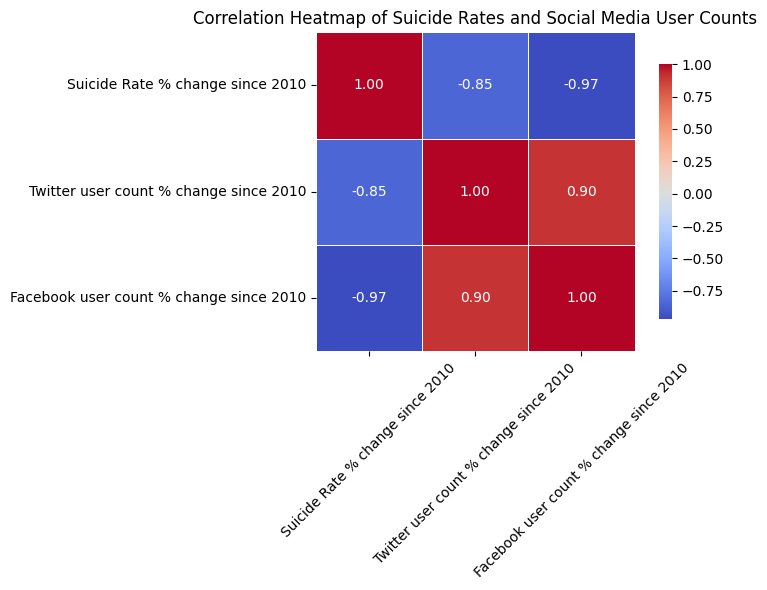

In [7]:

import seaborn as sns

# Calculate the correlation matrix
correlation = data[['Suicide Rate % change since 2010', 
                    'Twitter user count % change since 2010', 
                    'Facebook user count % change since 2010']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=.5)

# Customize the plot
plt.title('Correlation Heatmap of Suicide Rates and Social Media User Counts')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
